# Taylor problem 2.43

last revised: 08-Jan-2019 by Dick Furnstahl [furnstahl.1@osu.edu]

**Go through and fill in the blanks where ### appears.**

The goal of this problem is to plot the trajectory of a basketball with specified parameters, with and without air resistance.  From the plot we are to find how far the basketball travels horizontally in the two cases before hitting the floor.  

The differential equations to solve are equation (2.61) in Taylor:

$
\begin{align}
    m \ddot x &= - c \sqrt{\dot x^2 + \dot y^2}\, \dot x  \\
    m \ddot y &= - mg - c \sqrt{\dot x^2 + \dot y^2}\, \dot y  
\end{align}
$

where the initial conditions we are given (in meters) are:

$
\begin{align}
   x(0) &= 0 \;, & y(0) &= 2  \\
   \dot x(0) &= 15 \cos \pi/4 \;, & \dot y(0) &= 15\sin \pi/4
\end{align}
$

and $c = \gamma D^2$ with $\gamma = 0.25$ and $D = 0.24\,$m.

### Gameplan:

We'll follow the treatment at the end of Taylor_problem_1.39.ipynb.  So we rewrite the coupled 2nd-order differential equations $x(t)$ and $y(t)$ as four coupled 1st-order differential equations for $x(t)$, $y(t)$, $v_x(t)$, and $v_y(t)$:

$
\begin{align}
   \frac{d}{dt}\left(\begin{array}{c}
                          \mathbf{x} \\
                          \mathbf{v}
                      \end{array}\right)
               = \left(\begin{array}{c}
                          \mathbf{v} \\
                          \mathbf{F}/m
                       \end{array}\right)
      \qquad \Longrightarrow \qquad
   \frac{d}{dt}\left(\begin{array}{c}
                          x \\
                          y \\
                          v_x \\
                          v_y
                      \end{array}\right)
               = \left(\begin{array}{c}
                          v_x \\
                          v_y \\
                          F_x/m \\
                          F_y/m
                       \end{array}\right)
\end{align}
$

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams.update({'font.size': 16})### Import what you need to make arrays, to make plots, and to use odeint.

In [2]:
def ode_rhs(u_vec, t, *params):
    """ 
    Right-hand side (rhs) of the differential equation, with 
    u_vec = [x, y, v_x, v_y] and params = [m, g, c].
    """
    x, y, v_x, v_y = u_vec  
    m, g, c = params
    return [v_x, v_y, - (c/m) * np.sqrt(v_x**2 + v_y**2) * v_x,-g - (c/m) * np.sqrt(v_x**2 + v_y**2) * v_y]

In [3]:
m = 0.6      # units: kg
g = 9.8      # units: m/s^2
gamma = 0.25 # units: N s^2/m^4
D = 0.24     # units: m
c = gamma * D**2

theta = np.pi/4.  # angle of launch
v0 = 15.          # launch speed

# set the initial conditions
u0_vec = [0, 2, v0*np.cos(theta), v0*np.sin(theta)]  ### complete the initial conditions

t_max = 3.  # integration time
t_pts = np.arange(0,10,0.01)  ### create a suitable array of t values

# absolute and relative tolerances for ode solver
abserr = 1.0e-8
relerr = 1.0e-6

# Integrate the differential equation
#  Note the use of T here to take the *transpose* to change a 
#  (# points) by 4 array to a 4 by (# points) array.
x, y, v_x, v_y = odeint(ode_rhs, u0_vec, t_pts, args=(m, g, c), 
                        atol=abserr, rtol=relerr).T

Check the shape (i.e., dimensions) of the output from odeint:

In [4]:
(odeint(ode_rhs, u0_vec, t_pts, args=(m, g, c), 
                        atol=abserr, rtol=relerr)).shape

(1000, 4)

In [5]:
(odeint(ode_rhs, u0_vec, t_pts, args=(m, g, c), 
                        atol=abserr, rtol=relerr).T).shape

(4, 1000)

Define a function for the trajectory in vacuum, using the analytic formula:

In [6]:
### Just check that this makes sense
def vacuum_trajectory(u0_vec, t_pts, g=9.8):
    """Given the initial condition vector and an array of time values,
       return the trajectory (x and y arrays) in the vacuum, using the
       exact solution.
    """
    x0, y0, v0_x, v0_y = u0_vec 
    return v0_x * t_pts, \
           y0 + v0_y * t_pts - g * t_pts**2/2.

# create arrays for the vaccum trajectory (using default for g)    
x_vac, y_vac = vacuum_trajectory(u0_vec, t_pts)

Make a plot with and without drag:

<IPython.core.display.Javascript object>


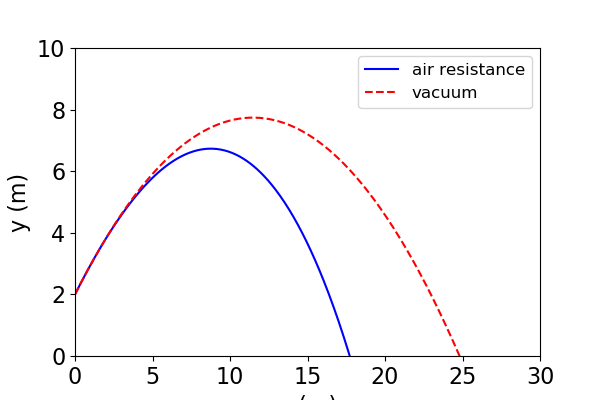

In [15]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'b-', label='air resistance', )
ax.plot(x_vac, y_vac, 'r--', label='vacuum', )
ax.set_ylim(0,10)    ### set appropriate limits on the y-axis
ax.set_xlim(0,30)    ### set appropriate limits on the x-axis
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

ax.legend(loc='upper right',fontsize=12)
fig.savefig('Taylor_prob_2.43.png', bbox_inches='tight')

We can read off rough values for the distances where the ball hits the ground.  Or we can find the closest values to zero in the arrays for `y` and `y_vac` and look up the value of `x` and `x_vac` at the same array index: 

In [16]:
# Note the use of fabs(y), which is |y|, to get closest to
#  zero instead of the most negative value of y.
index_y_min = (np.fabs(y)).argmin() # finds nearest index to minimum of |y|
print(f'distance with drag = {x[index_y_min]:.2f}' )

index_y_vac_min = (np.fabs(y_vac)).argmin() # finds nearest index to minimum of |y|
print(f'distance in vacuum = {x_vac[index_y_vac_min]:.2f}' )


distance with drag = 17.73
distance in vacuum = 24.82


**What change could you make to get a better estimate with the same method?**